In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("/kaggle/input/cassandra23-ps-2/dataset/train_data.csv")
test=pd.read_csv("/kaggle/input/cassandra23-ps-2/dataset/test_data.csv")

In [3]:
df.shape,test.shape

((72158, 24), (72158, 23))

In [4]:
for i in df.columns:
    print(len(df[i].unique()),i)

72158 UID
13387 trip_creation_time
1470 route_schedule_uuid
2 route_type
13535 trip_uuid
1456 source_center
1456 source_name
1434 destination_center
1433 destination_name
22127 od_start_time
22061 od_end_time
72158 start_scan_to_end_scan
2 is_cutoff
456 cutoff_factor
54192 cutoff_timestamp
72158 actual_distance_to_destination
57727 osrm_time
57727 osrm_distance
70515 factor
72158 segment_actual_time
72158 segment_osrm_time
72158 segment_osrm_distance
71000 segment_factor
2975 actual_time


In [5]:
def freq_encoder(arr):
    dic = {}
    j=0;
    
    for i in arr:
        
        if i not in   dic.keys():
            dic[i]=1;
#             j+=1;
        else:
            dic[i]+=1;
    return dic;


In [6]:
df.columns

Index(['UID', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'osrm_time',
       'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'segment_factor', 'actual_time'],
      dtype='object')

In [7]:
df.head()

,UID,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time
0,lWYYrbNEdf,2018-09-15 02:23:18.656742,thanos::sroute:9d8ed3f7-a8af-4393-ad7a-c57a720...,FTL,trip-153697819865649878,IND832109AAB,Jamshedpur_Central_I_3 (Jharkhand),IND834002AAB,Ranchi_Hub (Jharkhand),2018-09-15 02:23:18.656742,...,2018-09-15 04:45:23,158.807515,778.672716,1228.735753,2.782826,77.988686,20.793472,28.475783,3.292773,100.0
1,iNJcHQlPCm,2018-09-30 15:07:48.971326,thanos::sroute:b9142a73-d68f-46ec-9afc-d145479...,FTL,trip-153832006897106333,IND422011AAD,Nashik_TgrniaRD_I (Maharashtra),IND421302AAG,Bhiwandi_Mankoli_HB (Maharashtra),2018-09-30 22:38:13.903069,...,2018-10-01 05:38:30,81.388109,227.479029,NaN,3.625248,68.517914,18.787231,34.612259,4.277350,61.0
2,U6N0M43qwR,2018-09-23 22:15:46.635975,thanos::sroute:883e99fa-50a3-40e0-a2e2-9b12ed6...,FTL,trip-153774094663572416,IND845305AAA,Raxaul_KairiyaT_D (Bihar),NaN,Muzaffrpur_Bbganj_I (Bihar),2018-09-24 03:56:37.016232,...,2018-09-24 09:21:30,134.486898,400.072069,1188.943158,4.415969,70.475386,24.371978,29.867950,5.322072,69.0
3,RrJUneuYNj,2018-09-21 05:11:44.833176,thanos::sroute:96a80600-40e1-436b-9161-fa68f9e...,FTL,trip-153750670483274503,IND842001AAA,Muzaffrpur_Bbganj_I (Bihar),IND854326AAB,Purnia_Central_H_2 (Bihar),2018-09-22 10:08:32.593022,...,2018-09-22 14:09:17,262.866674,510.123878,999.421258,2.946647,101.876844,19.588977,27.794019,4.265799,300.0
4,7QLdD7iRC9,2018-09-18 01:10:49.936747,thanos::sroute:b43ec86d-59c1-452c-b4a9-807d357...,FTL,trip-153723305402762987,IND411033AAA,Pune_Tathawde_H (Maharashtra),IND501359AAE,Hyderabad_Shamshbd_H (Telangana),2018-09-18 01:10:49.936747,...,2018-09-18 12:14:05,379.389280,NaN,NaN,1.998790,46.571301,22.671495,26.971844,3.553652,286.0


In [8]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,actual_time
count,72158.000000,72158.000000,72158.000000,57726.000000,57726.000000,70514.000000,72158.000000,72158.000000,72158.000000,70999.000000,72158.000000
mean,1191.604676,233.406344,301.826483,645.031637,869.045744,2.559982,46.551549,22.444871,27.692491,3.002839,418.200934
std,1053.164936,345.952914,349.694923,420.347151,572.612453,1.739212,54.395587,16.182091,19.902876,4.423817,600.323169
min,32.280981,9.000000,9.135918,20.768357,14.965570,0.299470,-236.341748,0.003620,0.003119,-6.048567,9.000000
25%,390.701365,22.000000,84.076054,326.193956,431.585088,1.945478,28.407258,15.130634,17.454055,1.915661,51.000000
50%,727.355873,66.000000,152.478371,552.826964,742.508270,2.303918,39.147018,20.765332,27.240302,2.504303,132.000000
75%,1875.555264,286.000000,359.922622,868.111572,1176.440741,2.769924,52.721692,26.848582,33.697034,3.282884,513.000000
max,5271.669855,1914.000000,1949.210403,3186.653166,4156.700085,77.381429,3060.652522,1617.726759,2195.845793,362.559369,4154.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72158 entries, 0 to 72157
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UID                             72158 non-null  object 
 1   trip_creation_time              68643 non-null  object 
 2   route_schedule_uuid             69263 non-null  object 
 3   route_type                      72158 non-null  object 
 4   trip_uuid                       72158 non-null  object 
 5   source_center                   72158 non-null  object 
 6   source_name                     72158 non-null  object 
 7   destination_center              71355 non-null  object 
 8   destination_name                72158 non-null  object 
 9   od_start_time                   72158 non-null  object 
 10  od_end_time                     71438 non-null  object 
 11  start_scan_to_end_scan          72158 non-null  float64
 12  is_cutoff                       

In [10]:
df.isna().sum()

UID                                   0
trip_creation_time                 3515
route_schedule_uuid                2895
route_type                            0
trip_uuid                             0
source_center                         0
source_name                           0
destination_center                  803
destination_name                      0
od_start_time                         0
od_end_time                         720
start_scan_to_end_scan                0
is_cutoff                             0
cutoff_factor                         0
cutoff_timestamp                    930
actual_distance_to_destination        0
osrm_time                         14432
osrm_distance                     14432
factor                             1644
segment_actual_time                   0
segment_osrm_time                     0
segment_osrm_distance                 0
segment_factor                     1159
actual_time                           0
dtype: int64

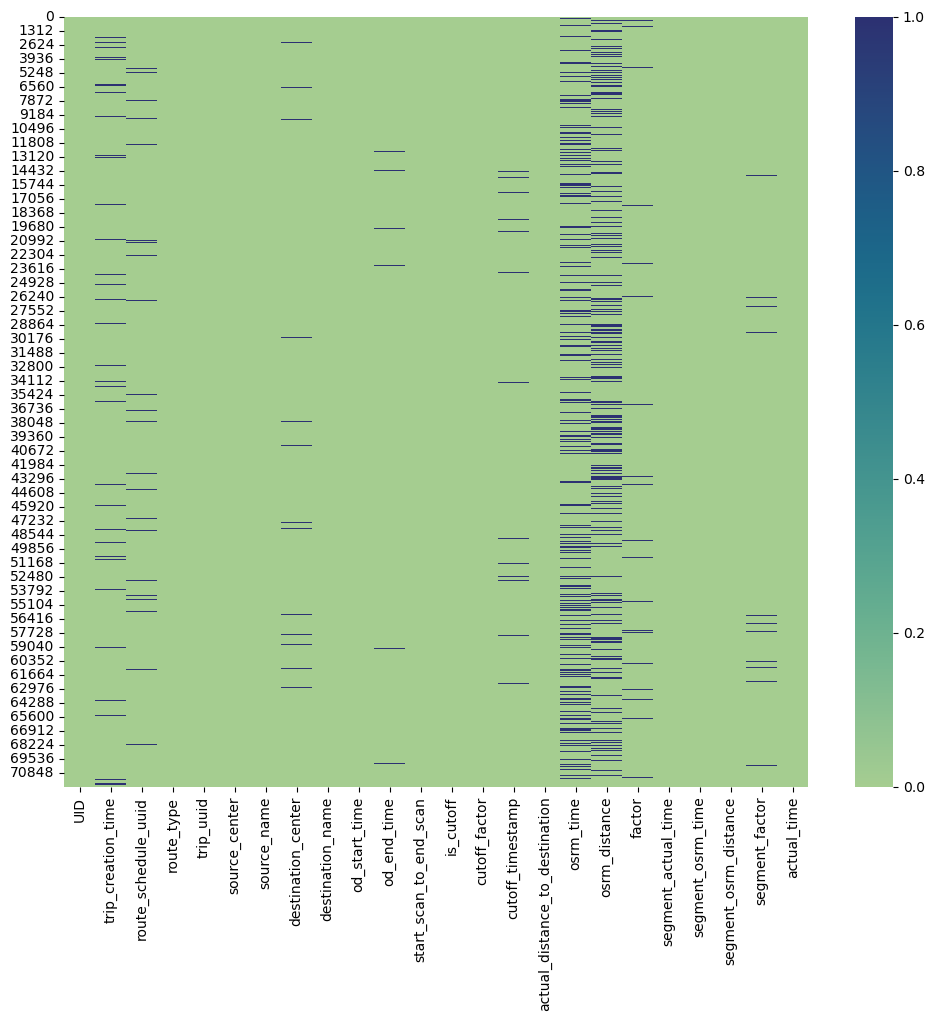

In [11]:
plt.figure(figsize=(12,10))
cor = df.isna()
sns.heatmap(cor, cmap="crest")
plt.show()

In [12]:
# df['segment_factor'] = df['segment_factor'].fillna(df['segment_factor'].mean())

In [13]:
# df['factor'] = df['factor'].fillna(df['factor'].mean())

In [14]:
mapping_dict = {}
unique_destinations = df.dropna(subset=['destination_center']).drop_duplicates(subset=['destination_name'])
for i, row in unique_destinations.iterrows():
    mapping_dict[row['destination_name']] = row['destination_center']
    
mapping_dicttest = {}
unique_destinationstest = test.dropna(subset=['destination_center']).drop_duplicates(subset=['destination_name'])
for i, row in unique_destinationstest.iterrows():
    mapping_dicttest[row['destination_name']] = row['destination_center']

# Fill in missing destination_id values based on destination_name
df['destination_center'] = df.apply(lambda x: mapping_dict[x['destination_name']] if pd.isnull(x['destination_center']) else x['destination_center'], axis=1)

In [15]:
df['destination_center'].isna().sum()

0

<AxesSubplot:>

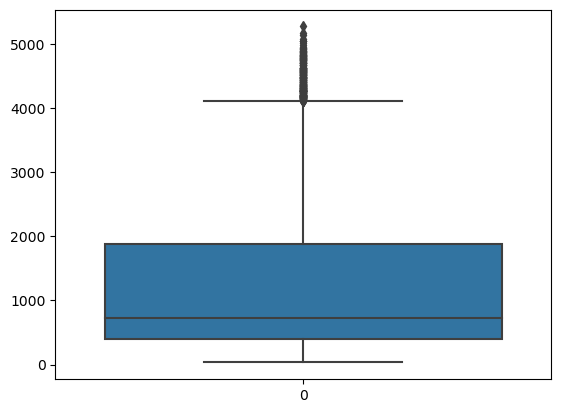

In [16]:
#for j in df.columns:
sns.boxplot(df['start_scan_to_end_scan'])

In [17]:
import datetime

In [18]:
df['trip_time']=(pd.to_datetime(df['od_end_time'],format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(df['od_start_time'],format='%Y-%m-%d %H:%M:%S')).dt.total_seconds()/60
test['trip_time']=(pd.to_datetime(test['od_end_time'],format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(test['od_start_time'],format='%Y-%m-%d %H:%M:%S')).dt.total_seconds()/60

df['trip_time1']=(pd.to_datetime(df['od_end_time'],format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(df['cutoff_timestamp'],format='%Y-%m-%d %H:%M:%S')).dt.total_seconds()/60
test['trip_time1']=(pd.to_datetime(test['od_end_time'],format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(test['cutoff_timestamp'],format='%Y-%m-%d %H:%M:%S')).dt.total_seconds()/60


df['trip_time2']=(pd.to_datetime(df['cutoff_timestamp'],format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(df['trip_creation_time'],format='%Y-%m-%d %H:%M:%S')).dt.total_seconds()/60
test['trip_time2']=(pd.to_datetime(test['cutoff_timestamp'],format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(test['trip_creation_time'],format='%Y-%m-%d %H:%M:%S')).dt.total_seconds()/60

df['trip_time3']=(pd.to_datetime(df['cutoff_timestamp'],format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(df['od_start_time'],format='%Y-%m-%d %H:%M:%S')).dt.total_seconds()/60
test['trip_time3']=(pd.to_datetime(test['cutoff_timestamp'],format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(test['od_start_time'],format='%Y-%m-%d %H:%M:%S')).dt.total_seconds()/60


df['trip_total_time']=(pd.to_datetime(df['od_end_time'],format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(df['trip_creation_time'],format='%Y-%m-%d %H:%M:%S')).dt.total_seconds()/60
test['trip_total_time']=(pd.to_datetime(test['od_end_time'],format='%Y-%m-%d %H:%M:%S')-pd.to_datetime(test['trip_creation_time'],format='%Y-%m-%d %H:%M:%S')).dt.total_seconds()/60

In [19]:
df['trip_time'].isna().sum()

720

In [20]:
df = df.drop(['od_end_time','od_start_time','trip_creation_time','cutoff_timestamp'],axis = 1)
test = test.drop(['od_end_time','od_start_time','trip_creation_time','cutoff_timestamp'],axis = 1)

In [21]:
# df['osrm_distance'] = df['osrm_distance'].fillna(df['osrm_distance'].notna().mean())
# df['osrm_time'] = df['osrm_time'].fillna(df['osrm_time'].notna().mean())
test['osrm_distance'] = test['osrm_distance'].fillna(test['osrm_distance'].notna().mean())
test['osrm_time'] = test['osrm_time'].fillna(test['osrm_time'].notna().mean())

In [22]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression
# # Separate the columns with missing unique IDs
# df_missing = df[df['destination_center'].isna()]
# df_not_missing = df[df['destination_center'].notna()]

# # Create a linear regression model
# model = LinearRegression()

# # Fit the model on the non-missing unique IDs
# X = df_not_missing.drop(['destination_center'], axis=1)
# y = df_not_missing['destination_center']
# model.fit(X, y)

# # Predict the missing unique IDs using the model
# X_missing = df_missing.drop(['destination_center'], axis=1)
# df_missing['destination_center'] = model.predict(X_missing)

# # Combine the missing and non-missing dataframes
# df_filled = pd.concat([df_missing, df_not_missing], axis=0)

# # Save the updated dataset
# df_filled.to_csv('/content/train_data.csv', index=False)


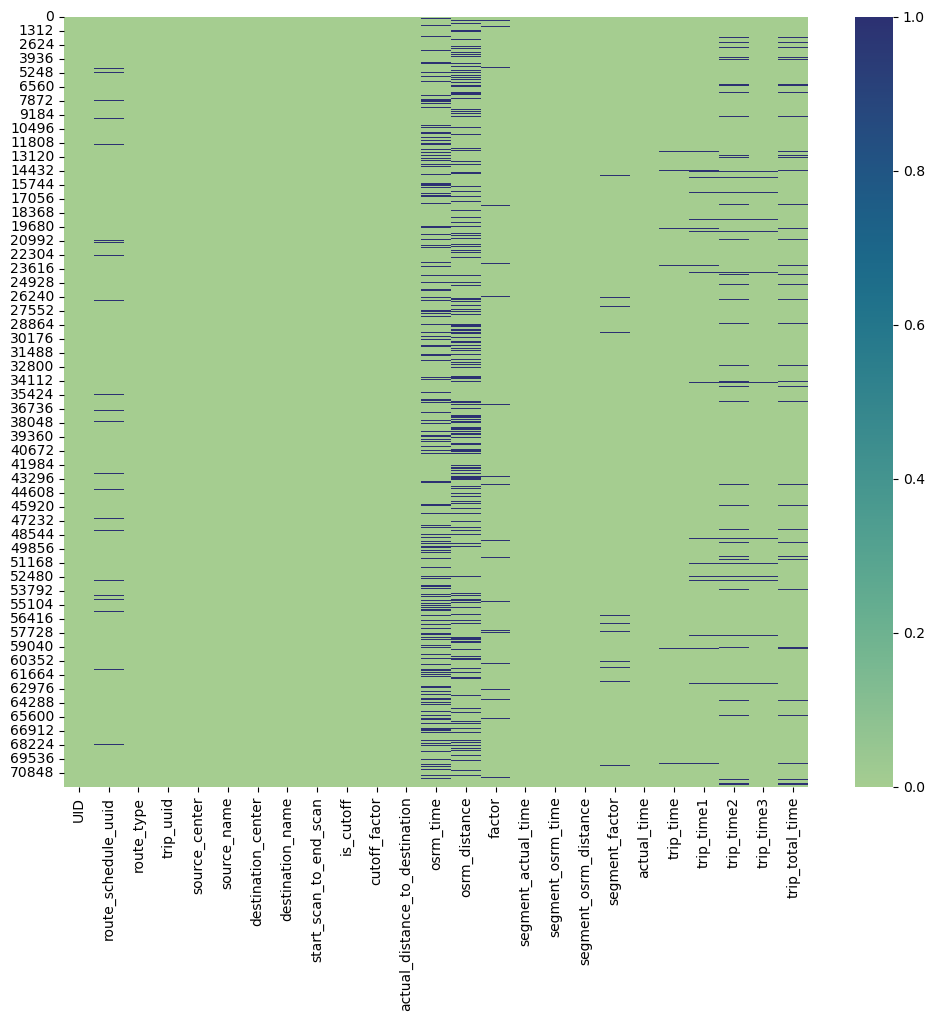

In [23]:
plt.figure(figsize=(12,10))
cor = df.isna()
sns.heatmap(cor, cmap="crest")
plt.show()

In [24]:
df['route_type'].value_counts()

FTL        49451
Carting    22707
Name: route_type, dtype: int64

In [25]:
dee = {'FTL':1,'Carting':0}

In [26]:
df['route_type'] = df['route_type'].map(dee)
test['route_type'] = test['route_type'].map(dee)

In [27]:
df['route_type'].head()

0    1
1    1
2    1
3    1
4    1
Name: route_type, dtype: int64

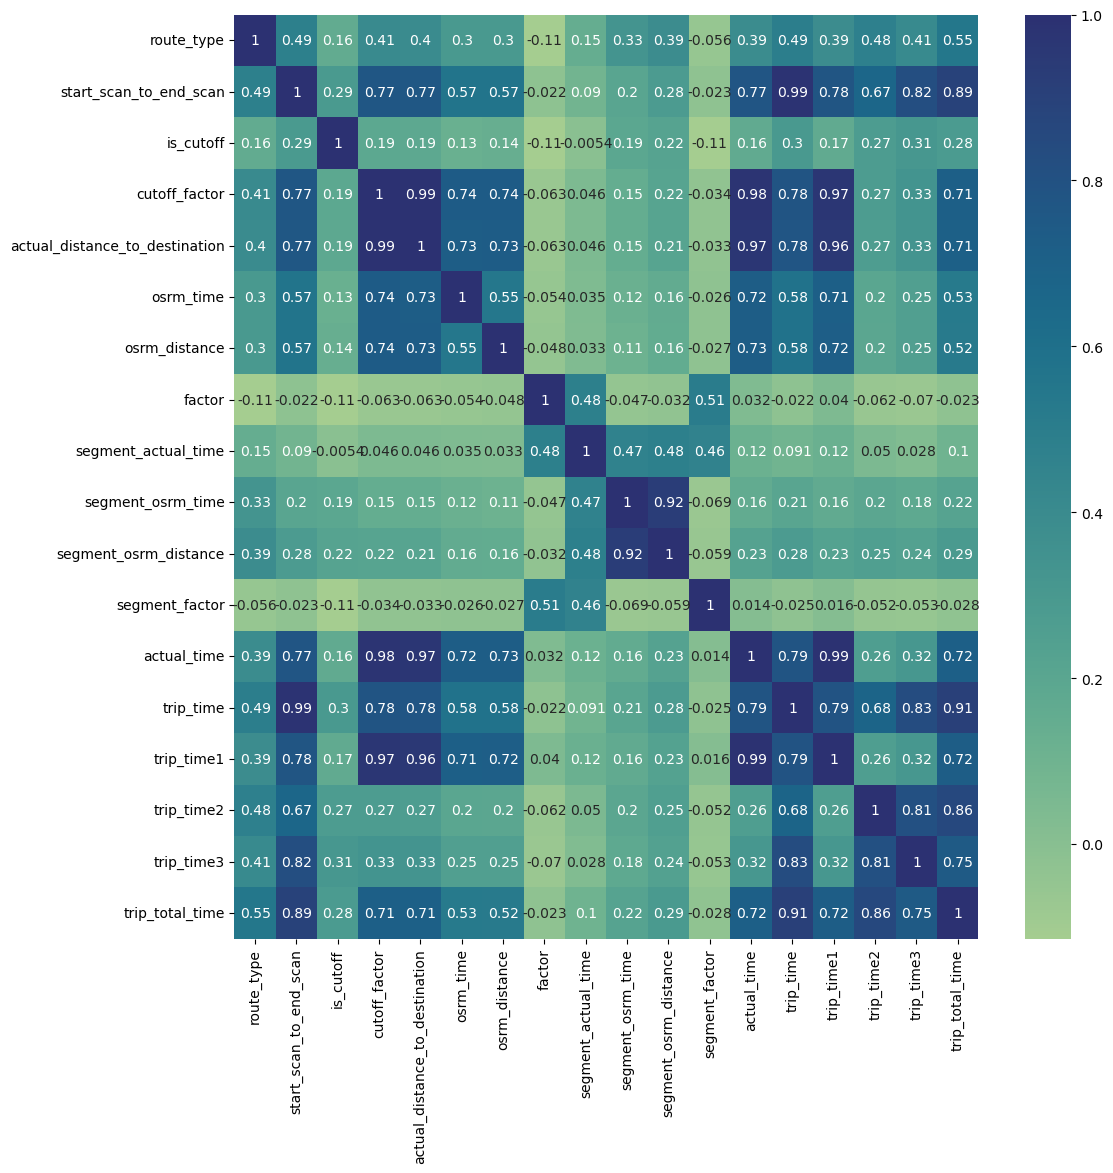

In [28]:
 plt.figure(figsize=(12,12))
cor = df.corr()
sns.heatmap(cor,annot=True, cmap="crest")
plt.show()

time-stamp =>date convert;
finding route schedule values by startind and end point and FTL;
destination center by destination name;
osrmtime,osrm distance by linear regression;

In [29]:
df['source-destin']=df['source_center']+df['destination_center'];
test['source-destin']=test['source_center']+test['destination_center'];
mappingdict=freq_encoder(df['source-destin']);
df['source-destin']=df['source-destin'].map(mappingdict)
test['source-destin']=(test['source-destin']).map(mappingdict);



mapper=freq_encoder(df['source_center']);
df['source_center']=df['source_center'].map(mapper)
test['source_center']=test['source_center'].map(mapper)

mapper=freq_encoder(df['destination_center']);
df['destination_center']=df['destination_center'].map(mapper)
test['destination_center']=test['destination_center'].map(mapper)

mapper=freq_encoder(df['route_schedule_uuid']);

df['route_schedule_uuid']=df['route_schedule_uuid'].map(mapper)
test['route_schedule_uuid']=test['route_schedule_uuid'].map(mapper)

df['destination_center'].isna().sum()

0

In [30]:
from sklearn.linear_model import LinearRegression
# Separate the columns with missing unique IDs
df["trip_time"] = df["trip_time"].fillna(df["trip_time"].notna().mean())
df["trip_time3"] = df["trip_time3"].fillna(df["trip_time3"].notna().mean())
df["trip_time2"] = df["trip_time2"].fillna(df["trip_time2"].notna().mean())
df["trip_time1"] = df["trip_time1"].fillna(df["trip_time1"].notna().mean())
df["trip_total_time"] = df["trip_total_time"].fillna(df["trip_time"].notna().mean())
df_missing = df[df['osrm_time'].isna()]
df_not_missing = df[df['osrm_time'].notna()]
print(df_missing.isna().sum())
print(df_not_missing.isna().sum())
# Create a linear regression model
model = LinearRegression()

# Fit the model on the non-missing unique IDs
X2 = df_not_missing.drop(["osrm_time","UID","trip_uuid","source_name","destination_name","osrm_distance","trip_time","factor","segment_factor","trip_total_time"], axis=1)
y2 = df_not_missing['osrm_time']
for col in X2.columns:
#     print(col)
    X2[col] = X2[col].fillna(X2[col].mean())

model.fit(X2, y2)

# Predict the missing unique IDs using the model
X_missing = df_missing.drop(["osrm_time","UID","trip_uuid","source_name","destination_name","factor","segment_factor","osrm_distance","trip_time","trip_total_time"], axis=1)
for col in X_missing.columns:
#     print(col)
    X_missing[col] = X_missing[col].fillna(X_missing[col].mean())
df_missing['osrm_time'] = model.predict(X_missing)

print(df_missing.isna().sum())
print(df_not_missing.isna().sum())
# # Combine the missing and non-missing dataframes
df['osrm_time'] = pd.concat([df_missing['osrm_time'], df_not_missing['osrm_time']], axis=0)

UID                                   0
route_schedule_uuid                   0
route_type                            0
trip_uuid                             0
source_center                         0
source_name                           0
destination_center                    0
destination_name                      0
start_scan_to_end_scan                0
is_cutoff                             0
cutoff_factor                         0
actual_distance_to_destination        0
osrm_time                         14432
osrm_distance                      2878
factor                              339
segment_actual_time                   0
segment_osrm_time                     0
segment_osrm_distance                 0
segment_factor                      214
actual_time                           0
trip_time                             0
trip_time1                            0
trip_time2                            0
trip_time3                            0
trip_total_time                       0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
from sklearn.linear_model import LinearRegression
# Separate the columns with missing unique IDs
df["trip_time"] = df["trip_time"].fillna(df["trip_time"].notna().mean())
df["trip_time1"] = df["trip_time1"].fillna(df["trip_time1"].notna().mean())
df["trip_time2"] = df["trip_time2"].fillna(df["trip_time2"].notna().mean())
df["trip_time3"] = df["trip_time3"].fillna(df["trip_time3"].notna().mean())
df["trip_total_time"] = df["trip_total_time"].fillna(df["trip_time"].notna().mean())
df_missing1 = df[df['osrm_distance'].isna()]
df_not_missing1 = df[df['osrm_distance'].notna()]
print(df_missing1.isna().sum())
print(df_not_missing1.isna().sum())
# Create a linear regression model
model = LinearRegression()

# Fit the model on the non-missing unique IDs
X1 = df_not_missing1.drop(["osrm_distance","UID","trip_uuid","source_name","destination_name","trip_time","factor","segment_factor","trip_total_time"], axis=1)
y1 = df_not_missing1['osrm_distance']
for col in X1.columns:
#     print(col)
    X1[col] = X1[col].fillna(X1[col].mean())

model.fit(X1, y1)

# Predict the missing unique IDs using the model
X_missing1 = df_missing1.drop(["UID","trip_uuid","source_name","destination_name","factor","segment_factor","osrm_distance","trip_time","trip_total_time"], axis=1)
for col in X_missing1.columns:
#     print(col)
    X_missing1[col] = X_missing1[col].fillna(X_missing1[col].mean())
df_missing1['osrm_distance'] = model.predict(X_missing1)

print(df_missing.isna().sum())
print(df_not_missing.isna().sum())
# # Combine the missing and non-missing dataframes
df['osrm_distance'] = pd.concat([df_missing1['osrm_distance'], df_not_missing1['osrm_distance']], axis=0)

UID                                   0
route_schedule_uuid                   0
route_type                            0
trip_uuid                             0
source_center                         0
source_name                           0
destination_center                    0
destination_name                      0
start_scan_to_end_scan                0
is_cutoff                             0
cutoff_factor                         0
actual_distance_to_destination        0
osrm_time                             0
osrm_distance                     14432
factor                              329
segment_actual_time                   0
segment_osrm_time                     0
segment_osrm_distance                 0
segment_factor                      225
actual_time                           0
trip_time                             0
trip_time1                            0
trip_time2                            0
trip_time3                            0
trip_total_time                       0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
test_data =test
X = df
X.info()
test_data.info()
X_testforfinal=test_data.drop(["UID","trip_uuid","source_name","destination_name"],axis=1)
X = df.drop(["UID","trip_uuid","source_name","destination_name","actual_time"],axis=1)
X.info()
X_testforfinal.info()
for col in X.columns:
    df[col] = df[col].fillna(df[col].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72158 entries, 0 to 72157
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   UID                             72158 non-null  object 
 1   route_schedule_uuid             72158 non-null  int64  
 2   route_type                      72158 non-null  int64  
 3   trip_uuid                       72158 non-null  object 
 4   source_center                   72158 non-null  int64  
 5   source_name                     72158 non-null  object 
 6   destination_center              72158 non-null  int64  
 7   destination_name                72158 non-null  object 
 8   start_scan_to_end_scan          72158 non-null  float64
 9   is_cutoff                       72158 non-null  bool   
 10  cutoff_factor                   72158 non-null  int64  
 11  actual_distance_to_destination  72158 non-null  float64
 12  osrm_time                       

In [33]:





# print(X_testforfinal)




# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LinearRegression
y = df['actual_time']

# imputer = SimpleImputer(strategy='mean')
# X = imputer.fit_transform(X)
# X_testforfinal=imputer.transform(X_testforfinal)
# model = LinearRegression()
# model.fit(X, y)
# new_data = pd.read_csv('/kaggle/input/cassandra23-ps-2/dataset/test_data.csv')
# new_X = imputer.transform(X_test)
# predictions = model.predict(new_X)

In [34]:
# plt.figure(figsize=(12,10))
# cor = df.isna()
# sns.heatmap(cor,annot=True, cmap="crest")
# plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler()

X = S.fit_transform(X)
pa=X_testforfinal;
X_testforfinal = S.transform(X_testforfinal)
pa==X_testforfinal

,route_schedule_uuid,route_type,source_center,destination_center,start_scan_to_end_scan,is_cutoff,cutoff_factor,actual_distance_to_destination,osrm_time,osrm_distance,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor,trip_time,trip_time1,trip_time2,trip_time3,trip_total_time,source-destin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72153,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
72154,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
72155,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
72156,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:



# X = new_X
# y = predictions
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(y_train.shape)

(72158, 21)
(72158,)
(57726, 21)
(57726,)


# lightbgm

In [37]:
# import lightgbm as lgb

# # defining parameters 
# params = {
#     'task': 'train', 
#     'boosting': 'gbdt',
#     'objective': 'regression',
#     'num_leaves': 2500,
#     'learnnig_rage': 0.01,
#     'metric': {'l2','l1'},
#     'verbose': -1
# }


In [38]:
# laoding data
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
#  # fitting the model
# model = lgb.train(params,
#                  train_set=lgb_train,
#                  valid_sets=lgb_eval,
#                  early_stopping_rounds=3000)



In [39]:
# prediction
# from sklearn.metrics import mean_squared_error

# y_pred = model.predict(X_test)

# # accuracy check
# mse = mean_squared_error(y_test, y_pred)
# rmse = mse**(0.5)
# print("MSE: %.2f" % mse)
# print("RMSE: %.2f" % rmse) 
 


# catboost

In [40]:
!pip install catboost

In [41]:
import catboost as cb
from sklearn.metrics import r2_score



In [42]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [43]:
model = cb.CatBoostRegressor(loss_function = 'RMSE')

In [44]:
grid = {'iterations': [10000],
        'learning_rate': [0.04,0.05],
        'depth': [ 6,7],
    
        'grow_policy':['SymmetricTree'],


#         "scale_pos_weight":[2],
        'logging_level':['Silent'],
        'l2_leaf_reg': [0.944]}
model.grid_search(grid, train_dataset)

0:	loss: 22.9806635	best: 22.9806635 (0)	total: 1m 35s	remaining: 4m 46s
1:	loss: 22.8623727	best: 22.8623727 (1)	total: 3m 11s	remaining: 3m 11s
2:	loss: 23.4329822	best: 22.8623727 (1)	total: 5m 12s	remaining: 1m 44s
3:	loss: 22.9217372	best: 22.8623727 (1)	total: 7m 14s	remaining: 0us
Estimating final quality...


{'params': {'depth': 6,
  'iterations': 10000,
  'learning_rate': 0.05,
  'l2_leaf_reg': 0.944,
  'grow_policy': 'SymmetricTree',
  'logging_level': 'Silent'},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
     

In [45]:
from sklearn.metrics import mean_squared_error
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
# print(“Testing performance”)
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

RMSE: 24.84
R2: 1.00


# desicion tree

In [46]:
# from sklearn.tree import DecisionTreeRegressor

# # Build decision tree
# model=DecisionTreeRegressor(max_depth=10000)
# model.fit(X_train,y_train)
# prediction
# from sklearn.metrics import mean_squared_error

# y_pred = model.predict(X_test)

# # accuracy check
# mse = mean_squared_error(y_test, y_pred)
# rmse = mse**(0.5)
# print("MSE: %.2f" % mse)
# print("RMSE: %.2f" % rmse) 
 

# random forest

In [47]:
# from sklearn.ensemble import RandomForestRegressor

# # define used regressor
# model=RandomForestRegressor(n_estimators=200,
#                              max_depth=100,
#                              criterion='squared_error',
#                             )

# # train model
# model.fit(X_train,y_train)
# from sklearn.metrics import mean_squared_error

# y_pred = model.predict(X_test)

# # accuracy check
# mse = mean_squared_error(y_test, y_pred)
# rmse = mse**(0.5)
# print("MSE: %.2f" % mse)
# print("RMSE: %.2f" % rmse) 


# Xgboost

In [48]:

# # Necessary imports
# import numpy as np
# import pandas as pd
# import xgboost as xg
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error as MSE
  

# # Train and test set are converted to DMatrix objects,
# # as it is required by learning API.
# train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
# test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
  
# # Parameter dictionary specifying base learner
# param = {"booster":"gblinear", "objective":"reg:linear"}
  
# model = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 1000)
# pred = model.predict(test_dmatrix)
  
# # RMSE Computation
# rmse = np.sqrt(MSE(y_test, pred))
# print("RMSE : % f" %(rmse))



# finaltesting

In [49]:
pred = model.predict(X_testforfinal)
pred,X_testforfinal


(array([ 32.55250185,  58.75207676,   8.90026726, ...,  52.53953632,
         85.72583513, 123.98375217]),
 array([[-0.43468533, -1.47573256, -0.67158726, ..., -0.69472773,
         -0.89855929, -0.51151619],
        [-0.43468533, -1.47573256, -0.67158726, ..., -0.73563024,
         -0.89855929, -0.51151619],
        [-0.43468533, -1.47573256, -0.66940455, ..., -0.6224571 ,
         -0.80267799, -0.49458173],
        ...,
        [-0.44175079, -1.47573256, -0.47829607, ..., -0.22157156,
         -0.63900109,  0.12634849],
        [-0.44175079, -1.47573256, -0.47829607, ..., -0.25736269,
         -0.63900109,  0.12634849],
        [-0.44175079, -1.47573256, -0.47829607, ..., -0.32605977,
         -0.63900109,  0.12634849]]))

In [50]:
pred = model.predict(X_testforfinal)
pred=np.round(pred);

In [51]:
data={"UID":test["UID"],"actual_time":pred}
dffinal = pd.DataFrame(data)
dffinal.to_csv("submission.csv",index=False);


In [52]:
dffinal

,UID,actual_time
0,XMsT9clviB,33.0
1,1iUuyRUZ2Y,59.0
2,wancwiAIU3,9.0
3,1tIt8EwJjB,61.0
4,W2vL6bJrjt,29.0
...,...,...
72153,L5IrEpNBFb,30.0
72154,s5TDXjnN3s,42.0
72155,0croXy5yK5,53.0
72156,P0okvBa2Ik,86.0


In [53]:
dfsec=pd.read_csv("/kaggle/input/cassandra23-ps-2/dataset/sample_submissions.csv")
dfsec

,UID,actual_time
0,XMsT9clviB,418
1,1iUuyRUZ2Y,418
2,wancwiAIU3,418
3,1tIt8EwJjB,418
4,W2vL6bJrjt,418
...,...,...
72153,L5IrEpNBFb,418
72154,s5TDXjnN3s,418
72155,0croXy5yK5,418
72156,P0okvBa2Ik,418
